# Världens invånarantal och förväntad livslängd
### Ett detaljerat exempel på Python-användning

I detta dokument ser vi på

- Var och hur man kan hitta datasets på webben
- Hur man läser in ett dataset och presenterar det i en graf
- Hur en tydlig graf bör se ut, och hur vi kan ändra designen på en graf
- Extra utmaning: hur man ritar två grafer med olika y-skalor i samma diagram, och hur man ska gå till väga för att lösa sådana, mer invecklade problem. 

### Introduktion och källor

I detta exempel vill vi åskådliggöra världens invånarantal genom tiderna och jämföra det med människans förväntade livslängd. Vi måste börja med att leta datasets. Jag sökte på [Ourworldindata](https://ourworldindata.org/) och hittade  [detta](https://ourworldindata.org/uploads/2013/05/WorldPopulationAnnual12000years_interpolated_HYDEandUNto2015.csv) dataset, som visar en uppskattning av världens invånarantal från år 10 000 f.kr till nutid. Datasets över förväntad livslängd var svårare att hitta, och något sånt är svårare att uppskatta till förhistorisk tid, men på [Gapminder](https://www.gapminder.org/data/documentation/gd004/) fanns ett som innefattar åren 1800-2020, med en uppskattning fram till 2100. Vi åskådliggör dessa datasets så att de går att jämföra i ett diagram.

Detta dokument beskriver processen som leder fram till en läsbar visualisering av data. Ett statistikarbete behöver inte innehålla dessa mellansteg, även om en förklaring av tillvägagångssätt rekommenderas.

### Behandling

Vi ska öppna våra datasets och se vad de innehåller. Vi börjar med att importera de paket som kommer att behövas.
Paketen **pandas**, **numpy** och **matplotlib.pyplot** är de som oftast behövs till detta ändamål.

För att koden ska fungera som planerat är det viktigt att du kör varje cell i tur och ordning (klicka på pilen i vänstra kanten bredvid texten **In[  ]**, eller markera cellen och tryck **Shift + Enter**). Cellernas ordningsföljd i dokumentet har ingen betydelse, de tolkas i den ordning man kör dem.

In [1]:
# Text som börjar med (#) påverkar inte koden.
# Det är bra att använda sådana kommentarer för att göra
#  koden lättare att förstå och navigera.

import pandas as pd              # Läser datafiler
import numpy as np               # Innehåller räknefunktioner
import matplotlib.pyplot as plt  # Ritar grafer

Nu ska vi läsa in datafilen. Funktionen **read_csv** som hör till paketet **pandas** kan läsa in en csv-fil (comma separated values), och göra den till en variabel. Vi sparar den som variabeln *data*. I kodcellen nedan har jag hänvisat till datafilen som finns i samma GitHub-repositorium som detta dokument.

**data.head** visar de fem första raderna av tabellen, så att vi kan se om formatet är ok.

In [5]:
data = pd.read_csv("WorldPopulationAnnual12000years_interpolated_HYDEandUNto2015.csv")
data.head()

,year,World Population (Spline Interpolation until 1950)
0,-10000,2431214.021
1,-9999,2432196.403
2,-9998,2433179.051
3,-9997,2434161.964
4,-9996,2435145.144


Vi märker att tabellen redan ser helt okej ut. Vanliga fel är att värdena är separerade på fel sätt (inte med kommatecken), så läsningen misslyckas, eller att tabellen saknar rubrik, så att de första värdena tas som kolumnrubriker istället. Här stämmer allt.

En sak som vi vill ändra på är ändå rubrikerna: Den ena kolumnen heter *"World Population (Spline Interpolation until 1950)"*, och det blir rörigt när vi ska hänvisa till det i koden. Vi läser in filen igen och ändrar kolumnrubrikerna till *"year"* och *"pop"*:

In [6]:
data = pd.read_csv("WorldPopulationAnnual12000years_interpolated_HYDEandUNto2015.csv",
                   header = 0,             
                   # header anger vilken rad i tabellen som räknas som rubrik. Ordningstalet 0 = den första.
                   names = ['year','pop']
                  )
data.head()

,year,pop
0,-10000,2431214.021
1,-9999,2432196.403
2,-9998,2433179.051
3,-9997,2434161.964
4,-9996,2435145.144


Nu kan vi redan rita ut vårt första dataset och iaktta det. Vi använder paketet **matplotlib.pyplot** för att rita grafer med funktionen **plot(x, y)**. Vi vill ha tiden på x-axeln, så vi hänvisar först till kolumnen *'year'* i tabellen, och sedan till kolumnen *'pop'*. 


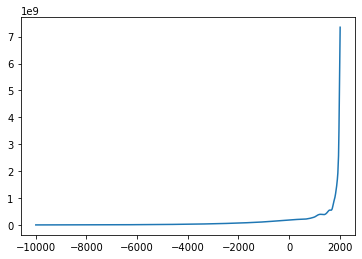

In [8]:
plt.plot(data['year'],data['pop'])

plt.show()

Allt bra så långt. Vi har en graf! Nu vill vi snygga till grafen lite:

- **plt.figure** låter oss bl.a. bestämma grafens storlek. 
- Parametern **color =** i plot-kommandot låter oss ändra grafens färg
- **plt.yscale('log')** ger grafen en logaritmisk skala, så att den svaga tillväxten i början är lättare att urskilja.
- **plt.grid** ger ett rutnät som också gör grafen lättare att läsa.
- **plt.title()** låter oss namnge diagrammet, och **plt.xlabel()**/**plt.ylabel()** låter oss namnge axlarna.

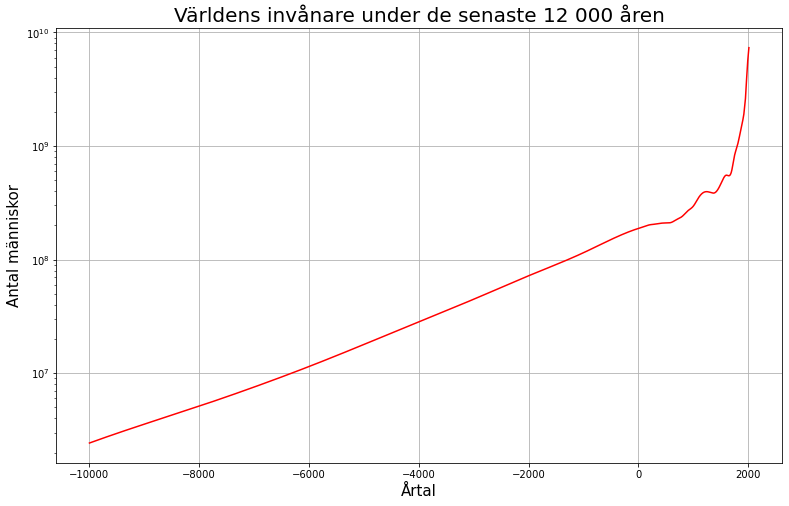

In [5]:
fig = plt.figure(figsize=(13, 8))
plt.plot(data['year'],data['pop'], color='red')


plt.yscale('log')
plt.grid()

plt.title('Världens invånare under de senaste 12 000 åren', fontsize = 20)
plt.xlabel('Årtal',fontsize = 15)
plt.ylabel('Antal människor', fontsize = 15)

plt.show()

Såja, nu har vi gjort en trevlig graf på vårt första dataset. Nu vill vi få ordning på det andra, så att vi sedan kan jämföra dem. Vi definierar en variabel **lex** och läser in vår nästa datafil till den.

Den fullständiga datafilen hittas [här](https://www.gapminder.org/data/documentation/gd004/), men jag har klippt ut den info vi behöver därifrån och sparat den som en .csv-fil i Data-mappen i samma GitHub-repositorium som detta dokument.

In [9]:
lex = pd.read_csv("life_expectancy1800-2020.csv")
lex.head()

,year,age
0,1800,30.64
1,1801,30.71
2,1802,30.60
3,1803,30.28
4,1804,30.20


Tabellen ser bra ut. Vi ritar upp den här som en graf också:

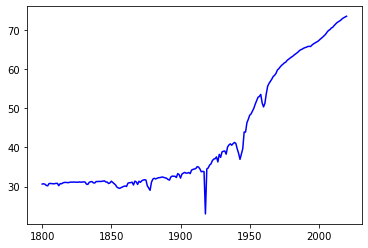

In [7]:
plt.plot(lex['year'],lex['age'], color='blue')

plt.show()

Vi märker att grafen har tydliga sänkor vid influensaepidemin 1918 och andra världskriget, 1944, samt en mindre sänka vid slutet på 1950-talet, som kanske beror på influensaepidemin 1956-58.

Det kan verka lite förvirrande att grafens y-axel inte börjar från noll, så vi använder **plt.ylim(min, max)** för att ändra y-axelns spann.

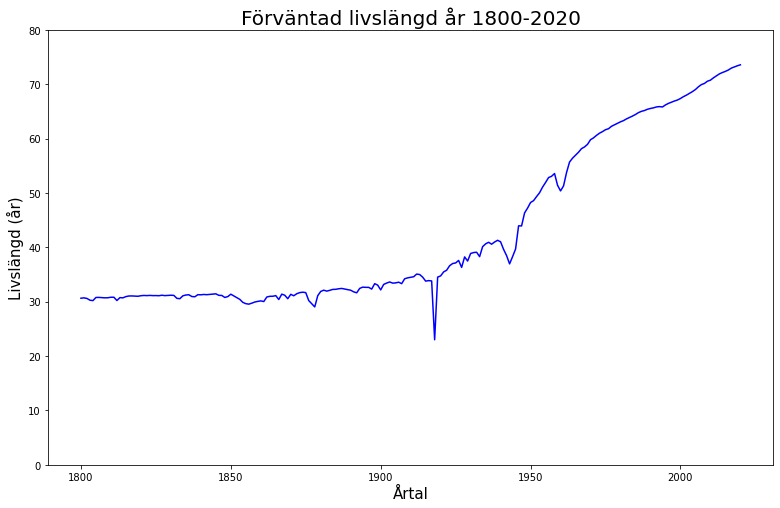

In [8]:
fig = plt.figure(figsize=(13, 8))
plt.plot(lex['year'],lex['age'], color='blue')

plt.ylim(0, 80)

plt.title('Förväntad livslängd år 1800-2020', fontsize = 20)
plt.xlabel('Årtal',fontsize = 15)
plt.ylabel('Livslängd (år)', fontsize = 15)


plt.show()

### Två grafer i samma diagram

För att jämföra de båda statistiska graferna vill vi sätta in båda i samma bild. Innan vi gör det måste vi dock åtgärda problemet med de olika tidsperioderna. Vårt andra dataset, **lex**, omfattar åren 1800-2020, så vi måste begränsa det andra datasetet till samma tidsspann.

In [9]:
data1800 = data[data.year >= 1800] # data1800 definieras som "de rader i tabellen data, där year-kolumnens
                                   #  värde är minst 1800.

data1800.head()   # Visar de första raderna i tabellen

,year,pop
11800,1800,9.898183e+08
11801,1801,9.937810e+08
11802,1802,9.978177e+08
11803,1803,1.001928e+09
11804,1804,1.006111e+09


Vi ser att tabellen nu visar åren 1800 och framåt, så vi märker at vårt urval lyckades. Vi vill hitta en metod för att få in två grafer med olika y-skalor i samma graf. Det låter invecklat men vi kan använda en metod som varje programmerare, oavsett kunskapsnivå, är bekant med:

- Googla *"pyplot dual y axis"*. 
- [Det första resultatet](https://matplotlib.org/2.2.5/gallery/api/two_scales.html) (med lite tur) innehåller en kod som gör ungefär det vi behöver.
- Vi kopierar koden och byter ut variabler och parametrar tills vi är nöjda med resultatet.

Koden, direkt kopierad, ser ut så här:
```python
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

```

Det viktiga i den här koden är kommandona **plt.subplots** och **.twinx**, som låter oss ha två grafer i samma diagram. Vi måste läsa igenom koden för att förstå hur den fungerar och ändra den efter vårt behov. Om du vill kan du kopiera in koden i en tom kodcell och köra den för att se vad den gör.

Vi ser att kodens x-axel visar tiden, **t**. Vi vill byta ut den mot **year**-kolumnen ur våra båda dataset. y-axlarnas värden är **data1** och **data2**. Vi byter ut dem mot **data1800['pop']** och **lex['age']**. Vi ändrar också på grafens titlar och lägger till **plt.grid()** för tydlighet.

Låt oss se hur det blir!

In [27]:
# Tom kodcell

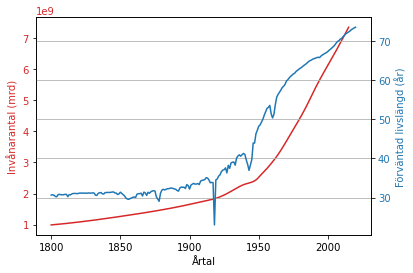

In [31]:

fig, ax1 = plt.subplots()


color = 'tab:red'
ax1.set_xlabel('Årtal')
ax1.set_ylabel('Invånarantal (mrd)', color=color)
ax1.plot(data1800['year'],data1800['pop'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Förväntad livslängd (år)', color=color)  
ax2.plot(lex['year'], lex['age'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.grid()

plt.show()

Båda graferna syns - så långt allt väl.

Vi behöver tänka på vilka detaljer som behöver ändras. 
- Grid-linjerna passar bara ihop med den ena y-skalan. Vi kan ändra skalorna så att de möter varandra snyggt. Vi kan också se till att de båda börjar från 0. Vi använder kommandot **.set(ylim(0,80))** och **.set(ylim(0,8e9))** för att få skalor som går jämnt ut och rymmer all info.
- Det skulle vara klarare att ha den blå skalan till vänster, eftersom den blå grafen mest ligger till vänster om den röda. Vi fixar det här genom att byta plats på variablerna
- Vi vill göra grafen lite större och texten lite tydligare, så vi sätter in **figsize**- och **fontsize**-parametrar där de behövs.


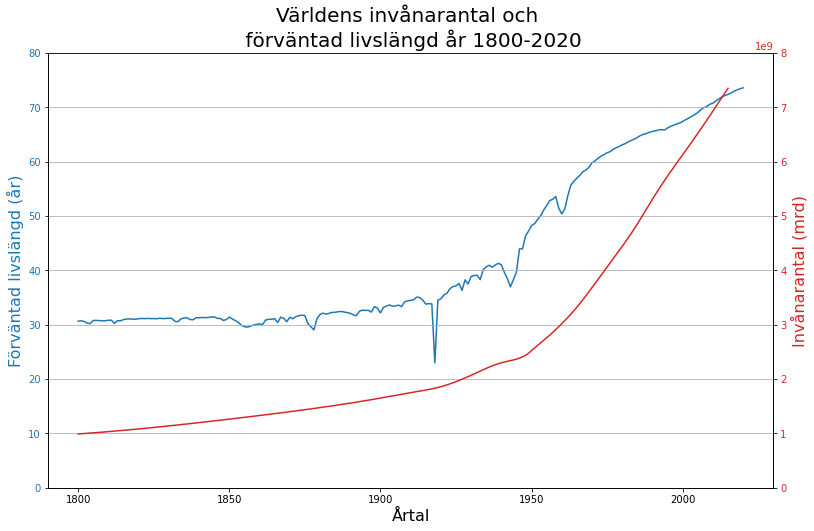

In [40]:

fig, ax1 = plt.subplots(figsize=(13, 8))


color = 'tab:blue'
ax1.set_xlabel('Årtal', size = 16)
ax1.set_ylabel('Förväntad livslängd (år)', color=color, fontsize = 16)  
ax1.plot(lex['year'], lex['age'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set(xlim=(1790, 2030), ylim=(0, 80))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Invånarantal (mrd)', color=color, fontsize = 16) # we already handled the x-label with ax1
ax2.plot(data1800['year'],data1800['pop'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set(xlim=(1790, 2030), ylim=(0, 8e9))

plt.title('Världens invånarantal och \n förväntad livslängd år 1800-2020', fontsize = 20)

plt.grid()

plt.show()

Nu är grafen tydlig att läsa och titlarna förklarar den utan att någon ytterligare beskrivning behövs. Svårlästa siffror i en tabell har blivit visuell information som kan tas in på några sekunder.

Nu får du praktisera det du har sett här. Vad vill du undersöka? Se om du kan hitta statistik och datafiler som intresserar. På vår [hemsida](https://avoin-data-opas.github.io/se/data/mista) hittar du länkar till andra hemsidor där du kan söka data.